# PLA - Exercise 1

This exercise is intended to create a simple perceptron to solve a binary classification problem with synthetic data generation

## Dataset

Each class will have exactly 250 data points and the seed should be set to 314.

Let's define the first class $X_1$:
- $X_1^1$ is a normal distribution with a mean of $-3$ and a standard deviation of $3$
- $X_1^2$ is a normal distribution with a mean of $-3$ and a standard deviation of $2$

The second class $X_2$ is defined as follows:
- $X_2^1$ is a normal distribution with a mean of $5$ and a standard deviation of $1.5$
- $X_2^2$ is a normal distribution with a mean of $0$ and a standard deviation of $1$

The class $X_1$ will have the label "+1" meanwhile $X_2$ will have the label "-1"

In [25]:
import numpy as np

seed = 314
np.random.seed(314)
n_samples = 250
rgen = np.random.RandomState(seed= seed)

x11 = rgen.normal(loc = -3, scale=3, size=n_samples)
x12 = rgen.normal(loc = -3, scale=2, size=n_samples)
y1 = np.ones(n_samples)

x21 = rgen.normal(loc = 5, scale=1.5, size=n_samples)
x22 = rgen.normal(loc = 5, scale = 1, size=n_samples)
y2 = -np.ones(n_samples)


Plot the generated dataset using the <tt>scatter</tt> function

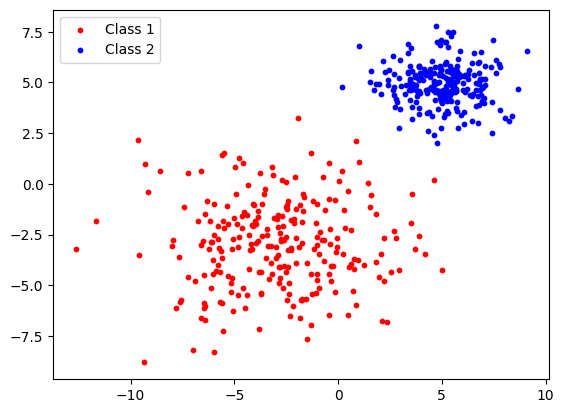

In [26]:
import matplotlib.pyplot as plt

plt.scatter(x11, x12, color = 'red', s = 10, label ="Class 1")
plt.scatter(x21, x22, color = 'blue', s = 10, label = "Class 2")
plt.legend()

Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

In [27]:
X = np.stack((np.ones(n_samples * 2), np.concatenate((x11, x21)), np.concatenate((x12, x22))), axis = 1)
Y = np.concatenate((y1,y2))

## Learning

Set up the vector of weight $w$ as a normal distribution with mean 0 and standard deviation 3 then train the Perceptron model using the basic __PLA__ algorithm, implementing the following requirements
- set parameter $\eta$ to $10^{-4}$
- set the maximum number of epochs to $500$

In addition, note that we want to keep track of the errors per epoch. Store in a vector named <tt>errors_epoch</tt> the number of misclassified objects for each epoch.


In [28]:
class Perceptron:
  def __init__(self, learning_rate = 1e-4, n_iterations = 500, random_state = 314):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.rgen = np.random.RandomState(seed = random_state)
    self.weights = None
    self.errors_epoch = []
  
  def activate(self, X):
    return X
  
  def predict(self, X):
    output = X @ self.weights
    return np.where(output >= 0, 1, -1)
  
  def train(self, X, y):
    n_samples, n_features = X.shape
    self.weights = self.rgen.normal(loc = 0, scale = 3, size = n_features)
    for _ in range(self.n_iterations):
      misclassified = 0
      for xi, target in zip(X,y):
        update = self.learning_rate * (target - self.predict(xi))
        self.weights += update * xi
        misclassified+= int(update != 0)
      self.errors_epoch.append(misclassified)
      if misclassified == 0:
        break
    return self.weights, self.errors_epoch

my_perceptron = Perceptron(learning_rate=1e-4, n_iterations=500, random_state=seed)

weights, errors_epoch = my_perceptron.train(X,Y)


Now draw the plots containing the solution found by the PLA and the plot containing the errors per epoch

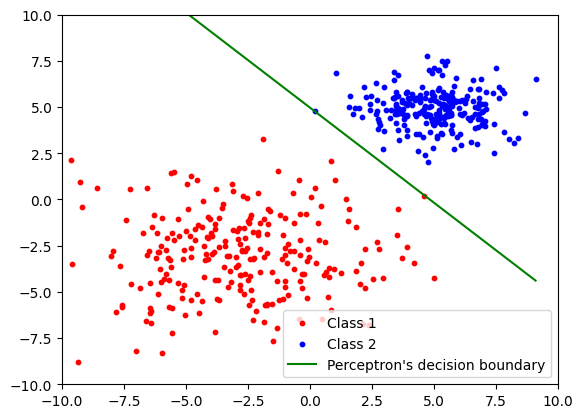

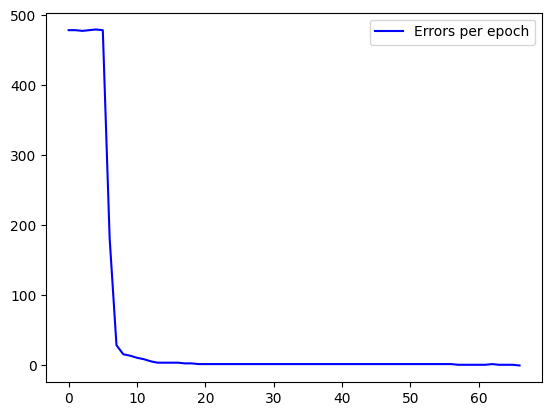

In [29]:
plt.scatter(x11, x12, color = 'red', s = 10, label = "Class 1")
plt.scatter(x21, x22, color = 'blue', s = 10, label = "Class 2")
plt.xlim(-10, 10)
plt.ylim(-10, 10)

x_plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
boundary = -(weights[0] + weights[1] * x_plot)/weights[2]

plt.plot(x_plot, boundary, color ='green', label = 'Perceptron\'s decision boundary')

plt.legend()
plt.show()


plt.plot(range(len(errors_epoch)), errors_epoch, color = 'blue', label = 'Errors per epoch')
plt.legend()